In [199]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from typing import List
import random

In [200]:
def plot_graph(x_list, k_list, err_list, alpha_list=None, x_star=None, n_list=None):
  if x_star:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
  if n_list:
    for k, err, n in zip(k_list, err_list, n_list):
      plot_gd_error(k, err, n=n)
  else:
    for k, err, alpha in zip(k_list, err_list, alpha_list):
      if x_star:
        plt.sca(axes[0])
      plot_gd_error(k, err, alpha)
  if x_star:
    for x, k in zip(x_list, k_list):
      plt.sca(axes[1])
      plot_relative_error(k, x, x_star)
  plt.show()

In [201]:
def plot_gd_error(k, err, alpha=None, n=None):
  if alpha:
    plt.plot(range(k), err, label=f"Gradient error using alpha={alpha}")
  elif n:
    plt.plot(range(k), err, label=f"Gradient error using n={n}")
  else:
    plt.plot(range(k), err, label=f"Gradient error using backtracking")
  plt.xlabel("Iterations")
  plt.ylabel("Gradient error")
  plt.legend()
  plt.grid()

In [202]:
def plot_relative_error(k, x_list, x_star):
  err = [np.linalg.norm(x-x_star, 2) for x in x_list]
  plt.plot(range(k), err, label="Solution relative error vs Iterations")
  plt.xlabel("Iterations")
  plt.ylabel("Solution relative error")
  plt.grid()

In [203]:
def plot_mono_function(a, b, x_list, f, x0, alpha):
  # Plot the function between a and b
  x = np.linspace(a, b, 200)
  y = f(x) # usando numpy si può anche fare y = f(x)
  plt.plot(x,y)
  plt.grid()

  # Plot the path of gd
  y_points = [f(xk) for xk in x_list]
  label_str = f"x0: {x0}, alpha: {alpha}" if alpha != -1 else f"x0:{x0} using backtraking"
  plt.plot(x_list, y_points, '-o', label=label_str)
  plt.legend()
  #plt.scatter(x_list, y_points, color='orange')

In [204]:
def plot_double_function(a, b, x_list, f):
  # Plot the function between a and b
  x = np.linspace(a, b, 200)
  y = f(x) # usando numpy si può anche fare y = f(x)
  plt.plot(x,y)
  plt.grid()

  # Plot the path of gd
  y_points = [f(xk) for xk in x_list]
  plt.plot(x_list, y_points, '-o')
  #plt.scatter(x_list, y_points, color='orange')

In [205]:
def backtracking(f, grad_f, x):
  """
  This function is a simple implementation of the backtracking algorithm for
  the GD (Gradient Descent) method.

  f: function. The function that we want to optimize.
  grad_f: function. The gradient of f(x).
  x: ndarray. The actual iterate x_k.
  """
  if not isinstance(x, int) and not isinstance(x, float):
    err_func = np.linalg.norm
    ord = 2
  else:
    err_func = np.abs
    ord = None

  alpha = 1
  c = 0.8
  tau = 0.25

  #print(f"{f(x - alpha * grad_f(x))} > {f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2}")
  #print(f"{x} - {alpha} * {grad_f(x)} = {x - alpha * grad_f(x)}")
  while f(x - alpha * grad_f(x)) > f(x) - c * alpha * err_func(grad_f(x), ord) ** 2: #use norm instead of asb if more than 1 dimension
      alpha = tau * alpha

      if alpha < 1e-3:
          break
  return alpha

In [206]:
def gd(f, grad_f, x0, kmax, tolf, tolx, base_alpha=None, x_star=None):
  # Specify wich distance function to use to compute error based on x dimension
  if not isinstance(x0, int) and not isinstance(x0, float):
    err_func = np.linalg.norm
    ord = 2
  else:
    err_func = np.abs
    ord = None

  #Initialize all the values
  xk = x0
  last_xk = 0
  x, f_val, grads, err = [], [], [], []
  condition = True
  k = 0

  while condition:
    # Save all the value of this iteration
    x.append(xk)
    f_val.append(f(xk))
    grad_val = grad_f(xk)
    grads.append(grad_val)
    err.append(err_func(grad_val, ord))
    k += 1
    last_xk = xk

    # Calculate the value of xk with gradient descend
    if not base_alpha:
      alpha = backtracking(f, grad_f, xk)
    else:
      alpha = base_alpha
    xk = xk - alpha*grad_f(xk)

    # Chek if the conditions still holds
    cond1 = k < kmax
    cond2 = err[-1] >= tolf*err_func(grad_f(x0), ord)
    cond3 = err_func(xk- last_xk, ord) >= tolx*err_func(x0, ord)
    condition = cond1 and cond2 and cond3

    # Print the reason that stopped the execution
    if not cond1:
      print("Stop because Kmax iterations reached")
    elif not cond2:
      print("Stop because error is less than tollerance")
    elif not cond3:
      print("Stop because difference between the two last xk is less than tollerance")

  # Print the value of relative error
  if x_star:
    rel_err = err_func(x[-1]-x_star,ord) / err_func(x_star, ord)
    print(f"Relative error: {rel_err}")

  return x, k, f_val, grads, err

Stop because error is less than tollerance
Relative error: 9.00949840925147e-06
Stop because error is less than tollerance
Relative error: 9.13438523337806e-06
Stop because Kmax iterations reached
Relative error: 0.13532607744362576


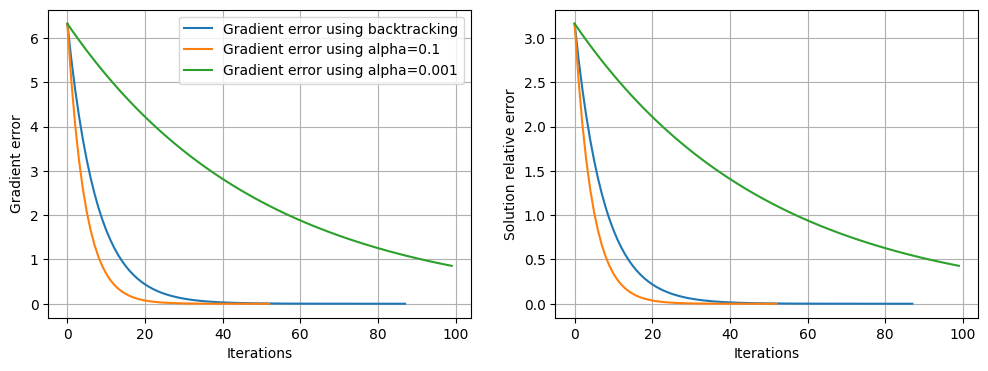

In [207]:
def f1(x):
  x1, x2 = x
  return (x1-3)**2 + (x2-1)**2

def grad_f1(x):
  x1, x2 = x
  return np.array([2*x1 - 6, 2*x2 - 2])

x1, k1, f_val1, grads1, err1 = gd(f1, grad_f1, np.array([0, 0]), 100, 1e-5, 1e-5, x_star=[3,1])
x2, k2, f_val2, grads2, err2 = gd(f1, grad_f1, np.array([0, 0]), 100, 1e-5, 1e-5, base_alpha=0.1, x_star=[3,1])
x3, k3, f_val3, grads3, err3 = gd(f1, grad_f1, np.array([0, 0]), 100, 1e-5, 1e-5, base_alpha=0.01, x_star=[3,1])

plot_graph([x1,x2,x3], [k1,k2,k3], [err1,err2,err3], [None, 0.1, 0.001], [3,1])

100 100
(100, 100) (100, 100) (100,)


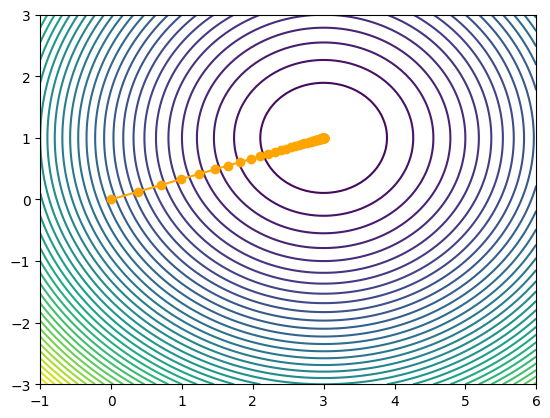

In [208]:
px = [elem[0] for elem in x1]
py = [elem[1] for elem in x1]
axis_x = np.linspace(-1, 6, 100).T
axis_y = np.linspace(-3, 3, 100).T
X, Y = np.meshgrid(axis_x, axis_y)
print(len(axis_x), len(axis_y))
Z = [f1([xi, yi]) for xi, yi in zip(X, Y)]
print(X.shape, Y.shape, Z[0].shape)
plt.contour(X, Y, Z, levels=40, cmap='viridis')
plt.plot(px, py, '-o', color='orange')
plt.show()

Stop because error is less than tollerance
Relative error: 4.18422348494792e-05
Stop because Kmax iterations reached
Relative error: 0.4472135954999579
Stop because Kmax iterations reached
Relative error: 0.12103932331693909


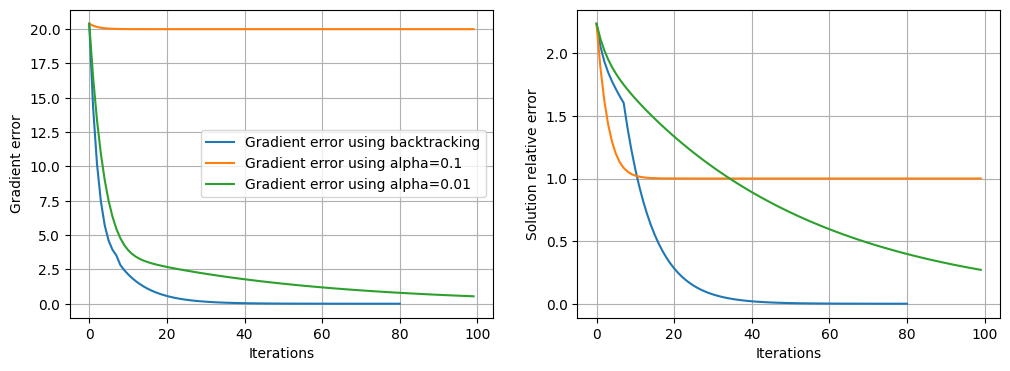

In [209]:
def f2(x):
  x1, x2 = x
  return 10*(x1-1)**2 + (x2-2)**2

def grad_f2(x):
  x1, x2 = x
  return np.array([20*(x1-1), 2*(x2 - 2)])

x1, k1, f_val1, grads1, err1 = gd(f2, grad_f2, np.array([0, 0]), 100, 1e-5, 1e-5, x_star=[1,2])
x2, k2, f_val2, grads2, err2 = gd(f2, grad_f2, np.array([0, 0]), 100, 1e-5, 1e-5, base_alpha=0.1, x_star=[1,2])
x3, k3, f_val3, grads3, err3 = gd(f2, grad_f2, np.array([0, 0]), 100, 1e-5, 1e-5, base_alpha=0.01, x_star=[1,2])

plot_graph([x1,x2,x3], [k1,k2,k3], [err1,err2,err3], [None, 0.1, 0.01], [1,2])

100 100
(100, 100) (100, 100) (100,)


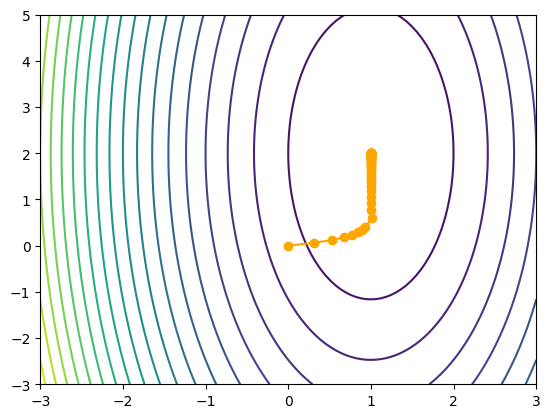

In [210]:
px = [elem[0] for elem in x1]
py = [elem[1] for elem in x1]
axis_x = np.linspace(-3, 3, 100).T
axis_y = np.linspace(-3, 5, 100).T
X, Y = np.meshgrid(axis_x, axis_y)
print(len(axis_x), len(axis_y))
Z = [f2([xi, yi]) for xi, yi in zip(X, Y)]
print(X.shape, Y.shape, Z[0].shape)
plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.plot(px, py, '-o', color='orange')
plt.show()

In [211]:
def f3(x):
  v = np.linspace(0, 1, n)
  A = np.vander(v)
  b = A @ np.ones(n)
  return 1/2 * np.linalg.norm(A@x - b, 2)**2

def grad_f3(x):
  v = np.linspace(0, 1, n)
  A = np.vander(v)
  b = A @ np.ones(n)
  return A@(A@x - b)

Stop because Kmax iterations reached
Stop because Kmax iterations reached
Stop because Kmax iterations reached
Stop because Kmax iterations reached


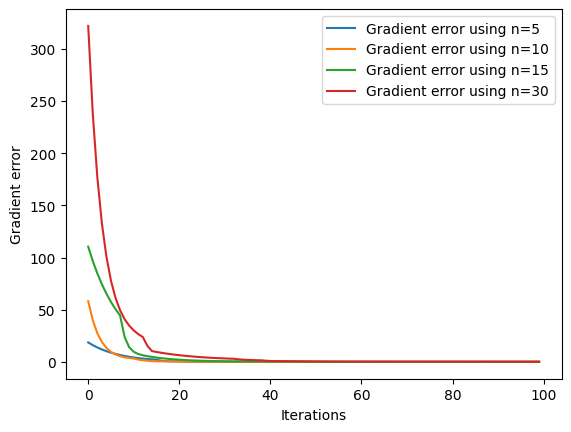

In [212]:
n = 5
x1, k1, f_val1, grads1, err1 = gd(f3, grad_f3, np.zeros(n), 100, 1e-5, 1e-5)
n = 10
x2, k2, f_val2, grads2, err2 = gd(f3, grad_f3, np.zeros(n), 100, 1e-5, 1e-5)
n = 15
x3, k3, f_val3, grads3, err3 = gd(f3, grad_f3, np.zeros(n), 100, 1e-5, 1e-5)
n = 30
x4, k4, f_val4, grads4, err4 = gd(f3, grad_f3, np.zeros(n), 100, 1e-5, 1e-5)

plot_graph([x1,x2,x3,x4], [k1,k2,k3,k4], [err1,err2,err3,err4], n_list=[5, 10, 15, 30],)

In [213]:
def f4(x):
  v = np.linspace(0, 1, n)
  A = np.vander(v)
  b = A @ np.ones(n)
  return 1/2 * np.linalg.norm(A@x - b, 2)**2 + delta/2 * np.linalg.norm(x, 2)**2

def grad_f4(x):
  v = np.linspace(0, 1, n)
  A = np.vander(v)
  b = A @ np.ones(n)
  return A@(A@x - b) + delta*x

Stop because Kmax iterations reached
Stop because Kmax iterations reached
Stop because Kmax iterations reached
Stop because Kmax iterations reached


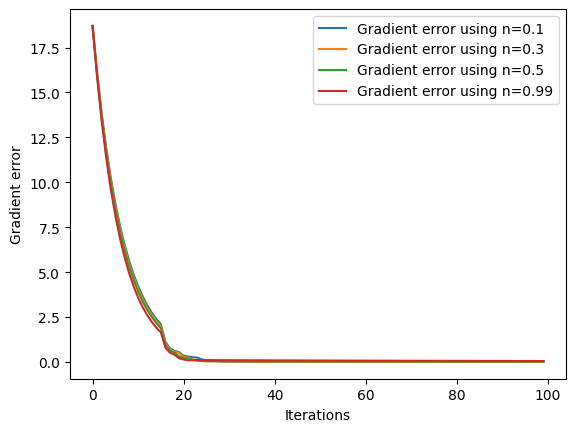

In [214]:
n = 5
delta = 0.1
x1, k1, f_val1, grads1, err1 = gd(f4, grad_f4, np.zeros(n), 100, 1e-5, 1e-5)
delta = 0.3
x2, k2, f_val2, grads2, err2 = gd(f4, grad_f4, np.zeros(n), 100, 1e-5, 1e-5)
delta = 0.5
x3, k3, f_val3, grads3, err3 = gd(f4, grad_f4, np.zeros(n), 100, 1e-5, 1e-5)
delta = 0.99
x4, k4, f_val4, grads4, err4 = gd(f4, grad_f4, np.zeros(n), 100, 1e-5, 1e-5)

plot_graph([x1,x2,x3,x4], [k1,k2,k3,k4], [err1,err2,err3,err4], n_list=[0.1, 0.3, 0.5, 0.99],)

Stop because error is less than tollerance
Stop because difference between the two last xk is less than tollerance
Stop because Kmax iterations reached
Stop because Kmax iterations reached
Stop because Kmax iterations reached


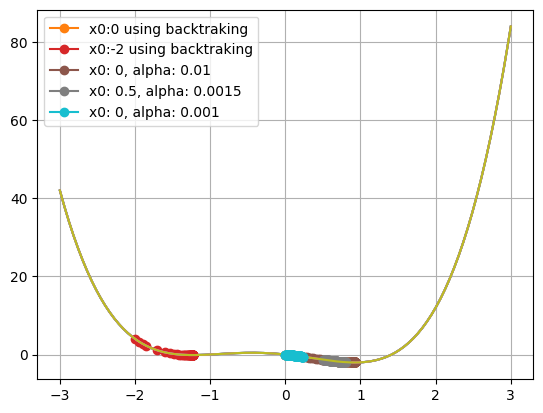

In [215]:
def f5(x):
  return x**4 + x**3 -2*(x)**2 - 2*x

def grad_f5(x):
  return 4*(x)**3 +3*(x)**2 - 4*x -2

x, k, f_val, grads, err = gd(f5, grad_f5, 0, 100, 1e-5, 1e-5)
plot_mono_function(-3, 3, x, f5, 0, -1)
x, k, f_val, grads, err = gd(f5, grad_f5, -2, 100, 1e-5, 1e-5)
plot_mono_function(-3, 3, x, f5, -2, -1)
x, k, f_val, grads, err = gd(f5, grad_f5, 0, 100, 1e-5, 1e-5, base_alpha=0.01)
plot_mono_function(-3, 3, x, f5, 0, 0.01)
x, k, f_val, grads, err = gd(f5, grad_f5, 0.5, 100, 1e-5, 1e-5, base_alpha=0.0015)
plot_mono_function(-3, 3, x, f5, 0.5, 0.0015)
x, k, f_val, grads, err = gd(f5, grad_f5, 0, 100, 1e-5, 1e-5, base_alpha=0.001)
plot_mono_function(-3, 3, x, f5, 0, 0.001)

In [216]:
### PARTE 2 HOMEWORK

In [217]:
def filter_df(df, digits):
  first_col = df.columns[0]
  filtered_df = df[df[first_col].apply(lambda x: x in digits)]
  return filtered_df

In [218]:
# Define sigmoid
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [219]:
# Compute the value of f, fw(xhat)= sig(xhat.T@w)
def f(w, xhat):
  return sigmoid(xhat.T @ w)

def grad_f(w, xhat):
  return (sigmoid(xhat.T @ w )* (1 - sigmoid(xhat.T @ w)) * xhat.T)

In [220]:
def mse(x, y):
  return np.linalg.norm(x-y)**2

def grad_mse(grad_x, x, y):
  return grad_x.T * (x-y)

In [221]:
# Value of the loss, mse
def loss(w, X, y):
  sum_mse = 0

  for i,element in enumerate(X):
    y_pred = f(w, element)
    sum_mse += mse(y_pred, y[i])
  return sum_mse/len(y)

In [222]:
# Value of the gradient
def grad_loss(w, X, y):
  sum_mse = 0

  for i,element in enumerate(X):
    y_pred = f(w, element)
    grad_y_pred = grad_f(w, element)
    sum_mse += grad_mse(grad_y_pred, y_pred, y[i])
  return sum_mse/len(y)

In [223]:
def acc(pred, Y):
    tot = 0
    for i in range(len(Y)):
        if (int(pred[i]) == Y[i]):
            tot+=1
    return tot, tot/len(Y)

def predict(w, X, threshold = 0.5):
    N = X.shape[0]
    app = np.zeros(N)
    for i in range(N):
        result = f(w, X[i])
        if (result >= threshold):
            app[i] = 1
        else:
            app[i] = 0
    return app

def get_accuracy(Xt, Yt, w):
  N = Xt.shape[0]
  xhat = np.concatenate((np.ones((1,N)), Xt.T), axis=0).T
  pred = predict(w[-1], xhat)
  tot, avg = acc(pred, Yt)
  #print("- Matches:", int(tot))
  print("- Total entries:", int(Yt.shape[0]))
  print("- Accuracy:", round(avg*100, 2))


In [224]:
def sgd(l, grad_l, w0, data, batch_size, n_epochs):
  w, f_val, grads, err = [], [], [], []
  alpha = 1e-3

  X, y = data
  N = X.shape[0]
  xhat = np.concatenate((np.ones((1,N)), X.T), axis=0).T
  batch_per_epoch = N // batch_size

  for epoch in range(n_epochs):
    idx = np.arange(N)
    np.random.shuffle(idx)

    for k in range(batch_per_epoch):
      batch_indices = idx[k * batch_size : (k + 1) * batch_size]
      mx = xhat[batch_indices, :]
      my = y[batch_indices]
      wk = w0 - alpha * grad_l(w0, mx, my)
      w0 = wk
      w.append(wk)

    f_val.append(l(w0, xhat, y))
    grads.append(grad_l(w0, xhat, y))
    err.append(np.linalg.norm(grad_l(w0, xhat, y)))

  return w, f_val, grads, err

In [225]:
def logistic_gd(l, grad_l, w0, data, kmax, tolf, tolx, base_alpha=None):
  #Initialize all the values
  w, f_val, grads, err = [], [], [], []
  condition = True
  k = 0

  X, y = data
  N = X.shape[0]
  xhat = np.concatenate((np.ones((1,N)), X.T), axis=0).T
  wk = w0

  while condition:
    # Save all the value of this iteration
    w.append(wk)
    f_val.append(l(wk, xhat, y))
    grad_val = grad_l(wk, xhat, y)
    grads.append(grad_val)
    err.append(np.linalg.norm(grad_val))
    k += 1

    # Calculate the value of xk with gradient descend
    if not base_alpha:
      alpha = backtracking(l, grad_l, wk)
    else:
      alpha = base_alpha
    wk = w[-1] - alpha * grad_l(w[-1], xhat, y)

    # Chek if the conditions still holds
    cond1 = k < kmax
    cond2 = err[-1] >= tolf*np.linalg.norm(grad_l(w[-1], xhat, y))
    cond3 = np.linalg.norm(wk - w[-1]) >= tolx*np.linalg.norm(w[-1])
    condition = cond1 and cond2 and cond3

    # Print the reason that stopped the execution
    if not cond1:
      print("Stop because Kmax iterations reached")
    elif not cond2:
      print("Stop because error is less than tollerance")
    elif not cond3:
      print("Stop because difference between the two last xk is less than tollerance")

  return w, k, f_val, grads, err

In [233]:
def prepare_df(df, split_rate, digits):
  tmp_df = filter_df(df, digits)

  split_index = int(split_rate*len(tmp_df))
  train = tmp_df[:split_index]
  test = tmp_df[split_index:]

  train_y = np.array(train[train.columns[0]])
  train_x = np.array(train.drop(train.columns[0], axis=1))

  test_y = np.array(test[test.columns[0]])
  test_x = np.array(test.drop(test.columns[0], axis=1))

  if digits != [0, 1]:
    test_y[test_y == digits[0]] = 0
    test_y[test_y == digits[1]] = 1
    train_y[train_y == digits[0]] = 0
    train_y[train_y == digits[1]] = 1

  print(f"Train shape: {train_x.shape}, {train_y.shape}")
  print(f"Test shape: {test_x.shape}, {test_y.shape}")

  return train_x, train_y, test_x, test_y

In [240]:
def test_gd_sgd(train_x, train_y, test_x, test_y):
  w0 = np.random.normal(0, 0.1, train_x.shape[1]+1)
  n_epochs = 50
  batch_size = 50

  w, f_vals, grad_vals, err_vals = sgd(loss, grad_loss, w0, (train_x, train_y), batch_size, n_epochs)

  w_gd, k, f_vals_gd, grad_vals_gd, err_vals_gd = logistic_gd(loss, grad_loss, w0, (train_x, train_y), 50, 1e-5, 1e-5, 0.1)

  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
  axes[0].plot(range(n_epochs), err_vals)
  axes[0].set_title("Errors during SGD")
  axes[1].plot(range(k), err_vals_gd)
  axes[1].set_title("Errors during GD")
  plt.show()

  print("\nSGD ACCURACY:")
  print("----- TRAIN SET -----")
  get_accuracy(train_x, train_y, w)
  print("----- TEST SET -----")
  get_accuracy(test_x, test_y, w)

  print("\n")

  print("GD ACCURACY:")
  print("----- TRAIN SET -----")
  get_accuracy(train_x, train_y, w_gd)
  print("----- TEST SET -----")
  get_accuracy(test_x, test_y, w_gd)

In [228]:
df = pd.read_csv(r'sample_data/mnist_train_small.csv')

Train shape: (3058, 784), (3058,)
Test shape: (1311, 784), (1311,)


<ipython-input-218-ed28fb1e1fc7>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Stop because difference between the two last xk is less than tollerance


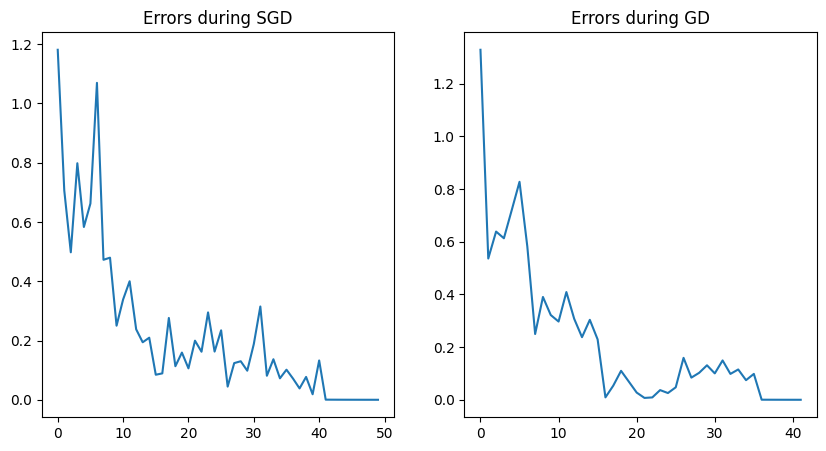


SGD ACCURACY:
----- TRAIN SET -----
- Total entries: 3058
- Accuracy: 97.55
----- TEST SET -----
- Total entries: 1311
- Accuracy: 97.41


GD ACCURACY:
----- TRAIN SET -----
- Total entries: 3058
- Accuracy: 97.68
----- TEST SET -----
- Total entries: 1311
- Accuracy: 97.64


In [245]:
train_x, train_y, test_x, test_y = prepare_df(df, 0.7, [1, 7])
test_gd_sgd(train_x, train_y, test_x, test_y)

Train shape: (2818, 784), (2818,)
Test shape: (1209, 784), (1209,)


<ipython-input-218-ed28fb1e1fc7>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Stop because Kmax iterations reached


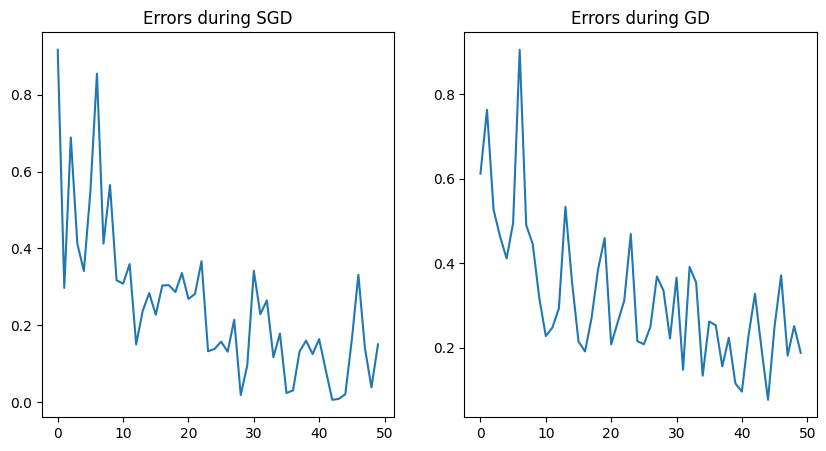


SGD ACCURACY:
----- TRAIN SET -----
- Total entries: 2818
- Accuracy: 91.52
----- TEST SET -----
- Total entries: 1209
- Accuracy: 90.07


GD ACCURACY:
----- TRAIN SET -----
- Total entries: 2818
- Accuracy: 94.71
----- TEST SET -----
- Total entries: 1209
- Accuracy: 95.2


In [241]:
train_x, train_y, test_x, test_y = prepare_df(df, 0.7, [2, 6])
test_gd_sgd(train_x, train_y, test_x, test_y)

Train shape: (3624, 784), (3624,)
Test shape: (403, 784), (403,)


<ipython-input-218-ed28fb1e1fc7>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Stop because Kmax iterations reached


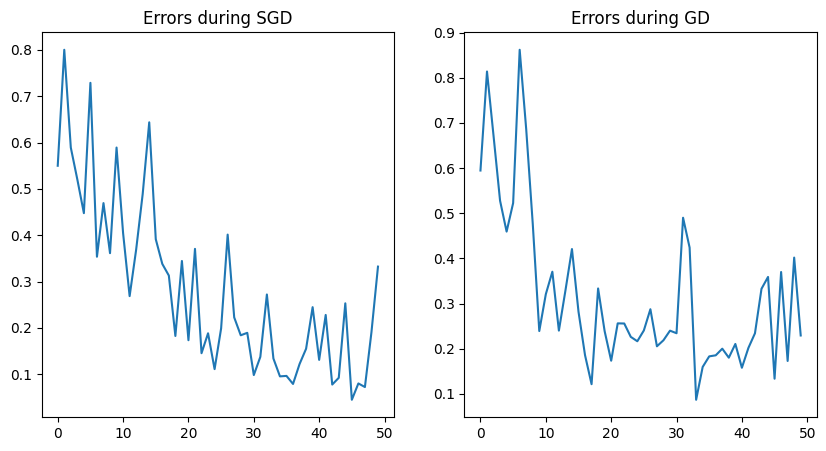


SGD ACCURACY:
----- TRAIN SET -----
- Total entries: 3624
- Accuracy: 91.58
----- TEST SET -----
- Total entries: 403
- Accuracy: 88.83


GD ACCURACY:
----- TRAIN SET -----
- Total entries: 3624
- Accuracy: 93.87
----- TEST SET -----
- Total entries: 403
- Accuracy: 91.81


In [242]:
train_x, train_y, test_x, test_y = prepare_df(df, 0.9, [2, 6])
test_gd_sgd(train_x, train_y, test_x, test_y)